In [1]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.9 MB/s eta 0:00:00


In [2]:
import yt_dlp
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [3]:
# Define playlist URLs
playlists = {
    "machine_learning": "https://www.youtube.com/playlist?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH",
    "deep_learning": "https://www.youtube.com/playlist?list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn",
    "nlp": "https://www.youtube.com/playlist?list=PLKnIA16_RmvZo7fp5kkIth6nRTeQQsjfX"
}

# Function to extract view counts
def get_views(playlist_url):
    ydl_opts = {
        'quiet': True,
        'extract_flat': True,
        'force_generic_extractor': True,
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        playlist_info = ydl.extract_info(playlist_url, download=False)

    return np.array([video.get('view_count', 0) for video in playlist_info['entries']])

# Fetch views for each playlist
machine_learning_views = get_views(playlists["machine_learning"])
deep_learning_views = get_views(playlists["deep_learning"])
nlp_views = get_views(playlists["nlp"])

# Print results
print("machine_learning_views =", machine_learning_views)
print("deep_learning_views =", deep_learning_views)
print("nlp_views =", nlp_views)

machine_learning_views = [1000000  193000  231000  151000  130000  120000  106000   90000  108000
   83000  157000  123000  149000   97000  124000   84000  127000  141000
   96000  134000  112000   78000  156000  151000  111000  116000  125000
  105000  142000   87000   67000   66000   45000   47000   76000   68000
   51000   53000   56000   42000   69000   60000   64000   38000   40000
   62000  120000   98000   61000  188000  127000  119000   92000   71000
   50000  193000   70000   52000   30000   72000   78000   94000   53000
   35000   32000   43000   28000   25000  136000   57000   70000   60000
   30000   53000   70000   60000   48000   24000   32000  114000   54000
   39000   30000   93000   33000   30000   21000   55000   32000   23000
   65000   33000   33000   36000   43000   25000   41000   46000   49000
   30000   22000   39000  103000   60000   45000   73000   36000   32000
   26000   45000   64000   54000  122000  103000   57000   35000   44000
   62000   24000   20000  

In [4]:
# # Data for each course (views per video in order)
# machine_learning_views = np.array([1000000, 192000, 230000, 151000, 130000, 120000, 105000, 89000, 107000, 83000, 157000, 122000, 149000, 96000,
#                                    123000, 84000, 127000, 141000, 96000, 134000, 111000, 78000, 156000, 150000, 110000, 116000, 125000, 105000,
#                                    142000, 87000, 66000, 66000, 45000, 47000, 75000, 67000, 50000, 53000, 55000, 42000, 69000, 59000, 63000, 38000,
#                                    40000, 62000, 120000, 98000, 61000, 187000, 126000, 119000, 92000, 71000, 50000, 192000, 70000, 52000, 30000,
#                                    72000, 78000, 94000, 53000, 35000, 32000, 42000, 28000, 25000, 136000, 57000, 70000, 60000, 30000, 53000, 69000,
#                                    59000, 48000, 24000, 32000, 114000, 54000, 39000, 30000, 93000, 33000, 30000, 21000, 55000, 32000, 23000, 65000,
#                                    33000, 32000, 36000, 43000, 25000, 41000, 46000, 49000, 29000, 22000, 39000, 103000, 60000, 45000, 73000, 36000,
#                                    32000, 26000, 45000, 63000, 54000, 122000, 103000, 57000, 35000, 44000, 62000, 24000, 20000, 21000, 23000, 24000,
#                                    22000, 23000, 18000, 53000, 25000, 20000, 20000, 28000, 26000, 15000])

# deep_learning_views = np.array([461000, 160000, 110000, 146000, 118000, 107000, 50000, 63000, 85000, 74000, 91000, 76000, 41000, 95000, 102000,
#                                63000, 41000, 37000, 71000, 51000, 42000, 43000, 32000, 44000, 29000, 56000, 77000, 38000, 42000, 29000, 62000,
#                                62000, 40000, 44000, 34000, 33000, 28000, 54000, 46000, 122000, 50000, 68000, 61000, 68000, 67000, 42000, 50000,
#                                33000, 199000, 52000, 51000, 34000, 90000, 32000, 77000, 87000, 63000, 40000, 46000, 39000, 80000, 64000, 55000,
#                                46000, 24000, 28000, 94000, 67000, 53000, 29000, 92000, 45000, 62000, 32000, 24000, 22000, 29000, 33000, 24000,
#                                28000, 19000, 16000, 15000, 17000])

# nlp_views = np.array([241000, 119000, 126000, 107000, 91000, 69000, 67000, 81000])

In [10]:
# Overall Course Engagement
total_videos = len(machine_learning_views) + len(deep_learning_views) + len(nlp_views)
total_views = machine_learning_views.sum() + deep_learning_views.sum() + nlp_views.sum()
average_views_per_video = total_views / total_videos
median_views_per_video = np.median(np.concatenate([machine_learning_views, deep_learning_views, nlp_views]))

# Display results
print(f"Total Videos Across All Courses: {total_videos}")
print(f"Total Views Across All Courses: {total_views / 1e6:.2f}M")
print(f"Average Views Per Video: {average_views_per_video / 1000:.1f}K")
print(f"Median Views Per Video: {median_views_per_video / 1000:.1f}K\n")

Total Videos Across All Courses: 225
Total Views Across All Courses: 16.38M
Average Views Per Video: 72.8K
Median Views Per Video: 55.0K



In [6]:
# Drop-off Rate Across Courses
drop_off_rate_ml = (1 - (machine_learning_views[-1] / machine_learning_views[0])) * 100
drop_off_rate_dl = (1 - (deep_learning_views[-1] / deep_learning_views[0])) * 100
drop_off_rate_nlp = (1 - (nlp_views[-1] / nlp_views[0])) * 100

# Prepare the data for tabulation
table_data = [
    ["Machine Learning (ML)", f"{machine_learning_views[0] // 1000}K", f"{machine_learning_views[-1] // 1000}K", f"{drop_off_rate_ml:.1f}%"],
    ["Deep Learning (DL)", f"{deep_learning_views[0] // 1000}K", f"{deep_learning_views[-1] // 1000}K", f"{drop_off_rate_dl:.1f}%"],
    ["NLP", f"{nlp_views[0] // 1000}K", f"{nlp_views[-1] // 1000}K", f"{drop_off_rate_nlp:.1f}%"]
]

# Display the table
headers = ["Course", "First Video Views", "Last Video Views", "Drop-off Rate (%)"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+-----------------------+---------------------+--------------------+---------------------+
| Course                | First Video Views   | Last Video Views   | Drop-off Rate (%)   |
+=======================+=====================+====================+=====================+
| Machine Learning (ML) | 1000K               | 15K                | 98.5%               |
+-----------------------+---------------------+--------------------+---------------------+
| Deep Learning (DL)    | 463K                | 17K                | 96.3%               |
+-----------------------+---------------------+--------------------+---------------------+
| NLP                   | 242K                | 82K                | 66.1%               |
+-----------------------+---------------------+--------------------+---------------------+


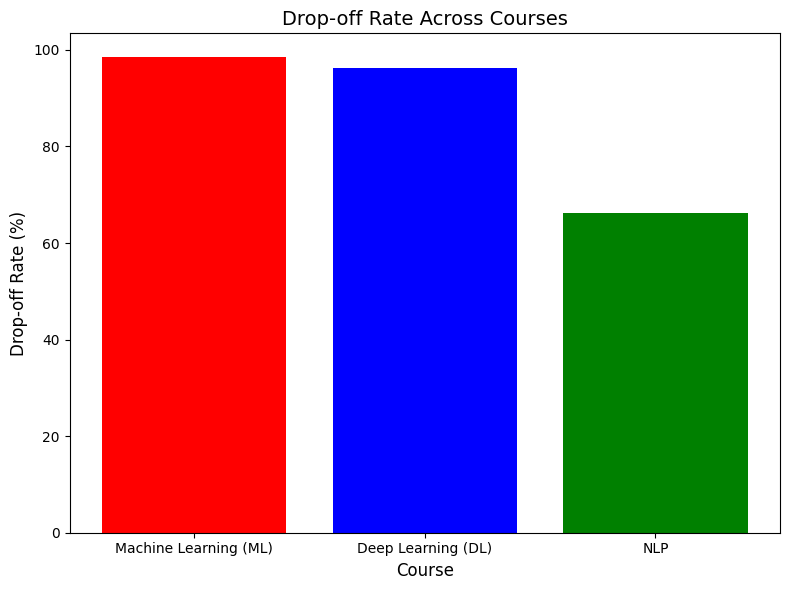

In [7]:
# Data for the bar chart
courses = ['Machine Learning (ML)', 'Deep Learning (DL)', 'NLP']
drop_off_rates = [drop_off_rate_ml, drop_off_rate_dl, drop_off_rate_nlp]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(courses, drop_off_rates, color=['red', 'blue', 'green'])

# Adding titles and labels
plt.title('Drop-off Rate Across Courses', fontsize=14)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Drop-off Rate (%)', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()

In [8]:
# Course Length vs Retention

total_views_ml = machine_learning_views.sum()
total_views_dl = deep_learning_views.sum()
total_views_nlp = nlp_views.sum()

average_views_ml = machine_learning_views.mean()
average_views_dl = deep_learning_views.mean()
average_views_nlp = nlp_views.mean()

median_views_ml = np.median(machine_learning_views)
median_views_dl = np.median(deep_learning_views)
median_views_nlp = np.median(nlp_views)

# Prepare the data for tabulation
table_data = [
    ["Machine Learning", len(machine_learning_views), f"{average_views_ml / 100:.1f}K", f"{median_views_ml / 100:.1f}K", f"{total_views_ml / 1e6:.2f}M"],
    ["Deep Learning", len(deep_learning_views), f"{average_views_dl / 100:.1f}K", f"{median_views_dl / 100:.1f}K", f"{total_views_dl / 1e6:.2f}M"],
    ["NLP", len(nlp_views), f"{average_views_nlp / 100:.1f}K", f"{median_views_nlp / 100:.1f}K", f"{total_views_nlp / 100:.1f}K"]
]

# Display the table
headers = ["Course", "Total Videos", "Average Views per Video", "Median Views per Video", "Total Views"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+------------------+----------------+---------------------------+--------------------------+---------------+
| Course           |   Total Videos | Average Views per Video   | Median Views per Video   | Total Views   |
+==================+================+===========================+==========================+===============+
| Machine Learning |            133 | 767.7K                    | 570.0K                   | 10.21M        |
+------------------+----------------+---------------------------+--------------------------+---------------+
| Deep Learning    |             84 | 626.8K                    | 505.0K                   | 5.26M         |
+------------------+----------------+---------------------------+--------------------------+---------------+
| NLP              |              8 | 1130.0K                   | 990.0K                   | 9040.0K       |
+------------------+----------------+---------------------------+--------------------------+---------------+


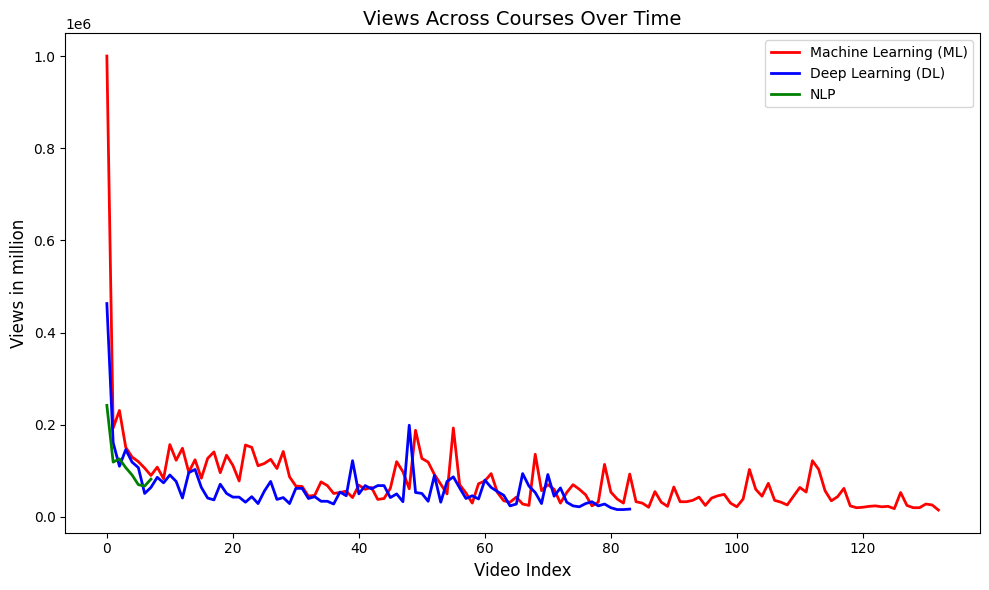

In [9]:
# Create the line plot for all courses
plt.figure(figsize=(10, 6))

# Plot views for each course
plt.plot(machine_learning_views, label='Machine Learning (ML)', color='red', linewidth=2)
plt.plot(deep_learning_views, label='Deep Learning (DL)', color='blue', linewidth=2)
plt.plot(nlp_views, label='NLP', color='green', linewidth=2)

# Adding titles and labels
plt.title('Views Across Courses Over Time', fontsize=14)
plt.xlabel('Video Index', fontsize=12)
plt.ylabel('Views in million', fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()